In [1]:
import matplotlib
matplotlib.use("nbagg")

import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

from utility import *

# Get Data 

In [2]:
train_input = importData(filename = 'pseudo_camaro-voxelized.txt', grid_size=100)
voting_input = importData(filename = 'pseudo_camaro-votingTensor.txt', grid_size=100)
corner_input = importData(filename = 'pseudo_camaro-Cornersvoxelized.txt', grid_size=100)
polycube_edges = importData(filename = 'pseudo_camaro-finalvoxelized.txt', grid_size=100)
final_polycube = importData(filename = 'pseudo_camaro-finalCubesvoxelized.txt', grid_size=100)

<class 'torch.IntTensor'> torch.Size([100, 100, 100])
<class 'torch.IntTensor'> torch.Size([100, 100, 100])
<class 'torch.IntTensor'> torch.Size([100, 100, 100])
<class 'torch.IntTensor'> torch.Size([100, 100, 100])
<class 'torch.IntTensor'> torch.Size([100, 100, 100])


# Plot Data

<IPython.core.display.Javascript object>


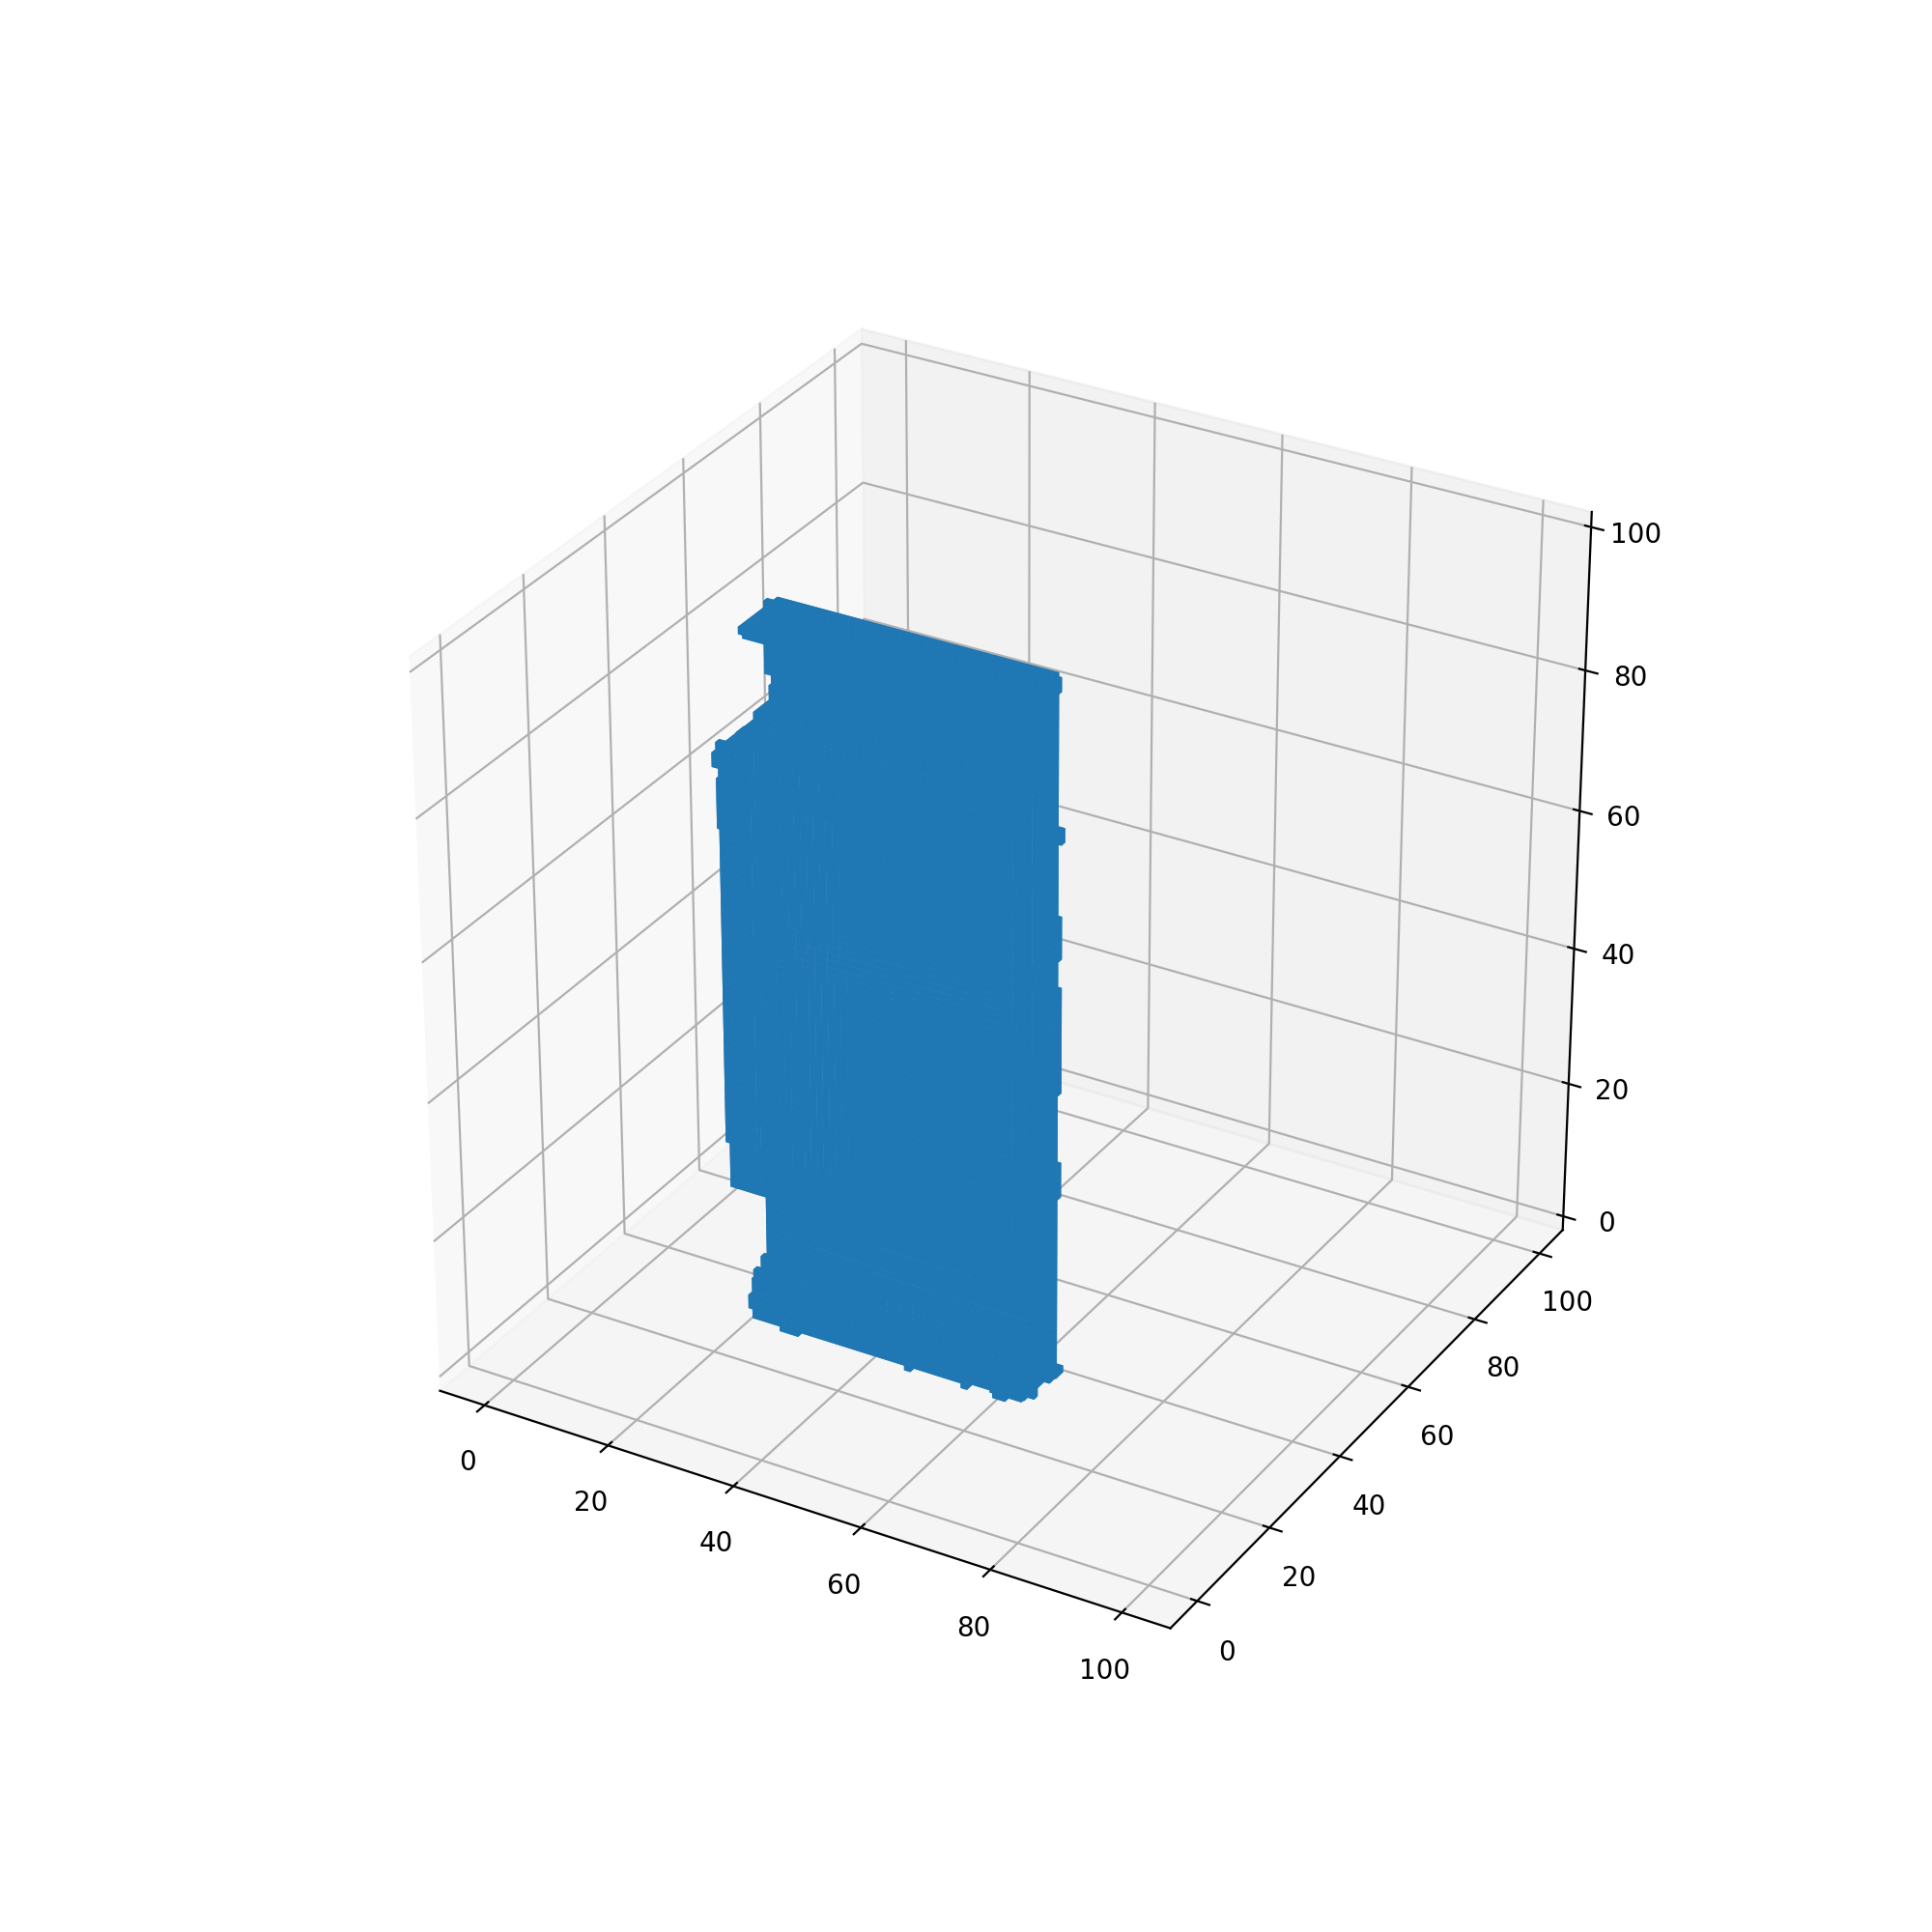

In [3]:
voxels = np.array(train_input)

# and plot everything
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.voxels(voxels)
fig.savefig('VoxelizedFinal.png')
fig.show()

<IPython.core.display.Javascript object>


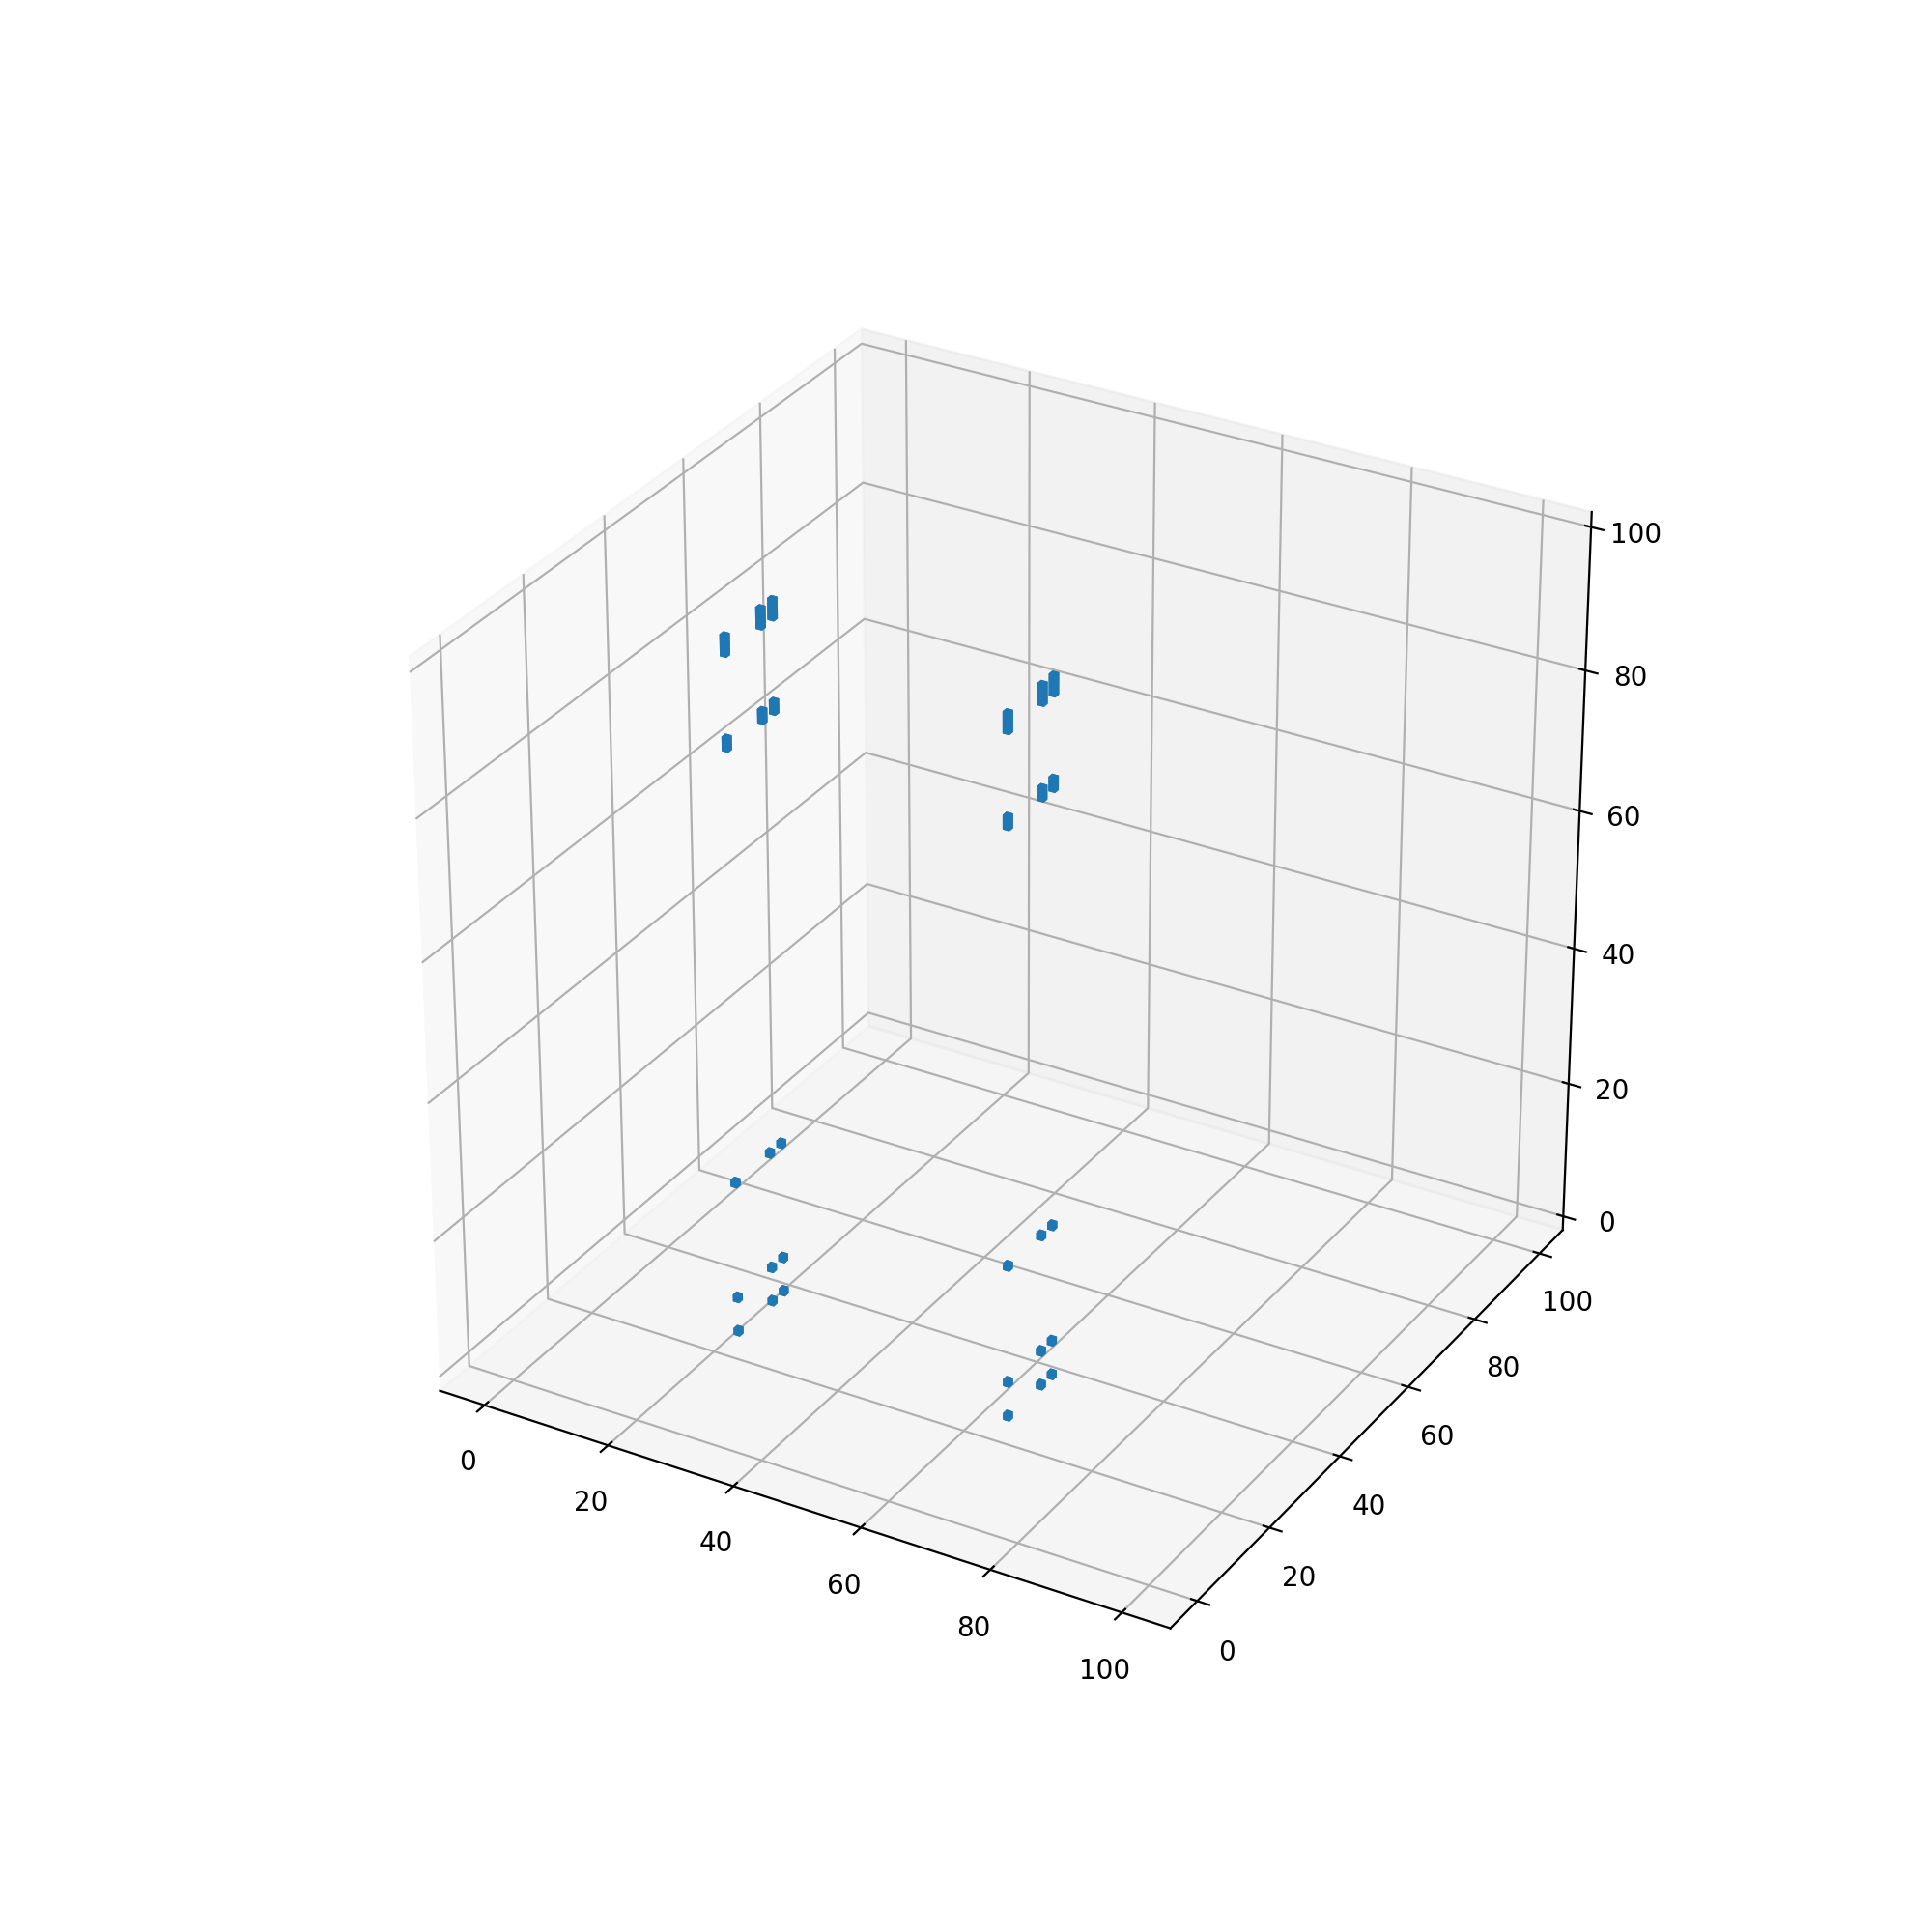

In [4]:
voxels = np.array(polycube_edges)

# and plot everything
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.voxels(voxels)
fig.savefig('VoxelizedFinal.png')
fig.show()

<IPython.core.display.Javascript object>


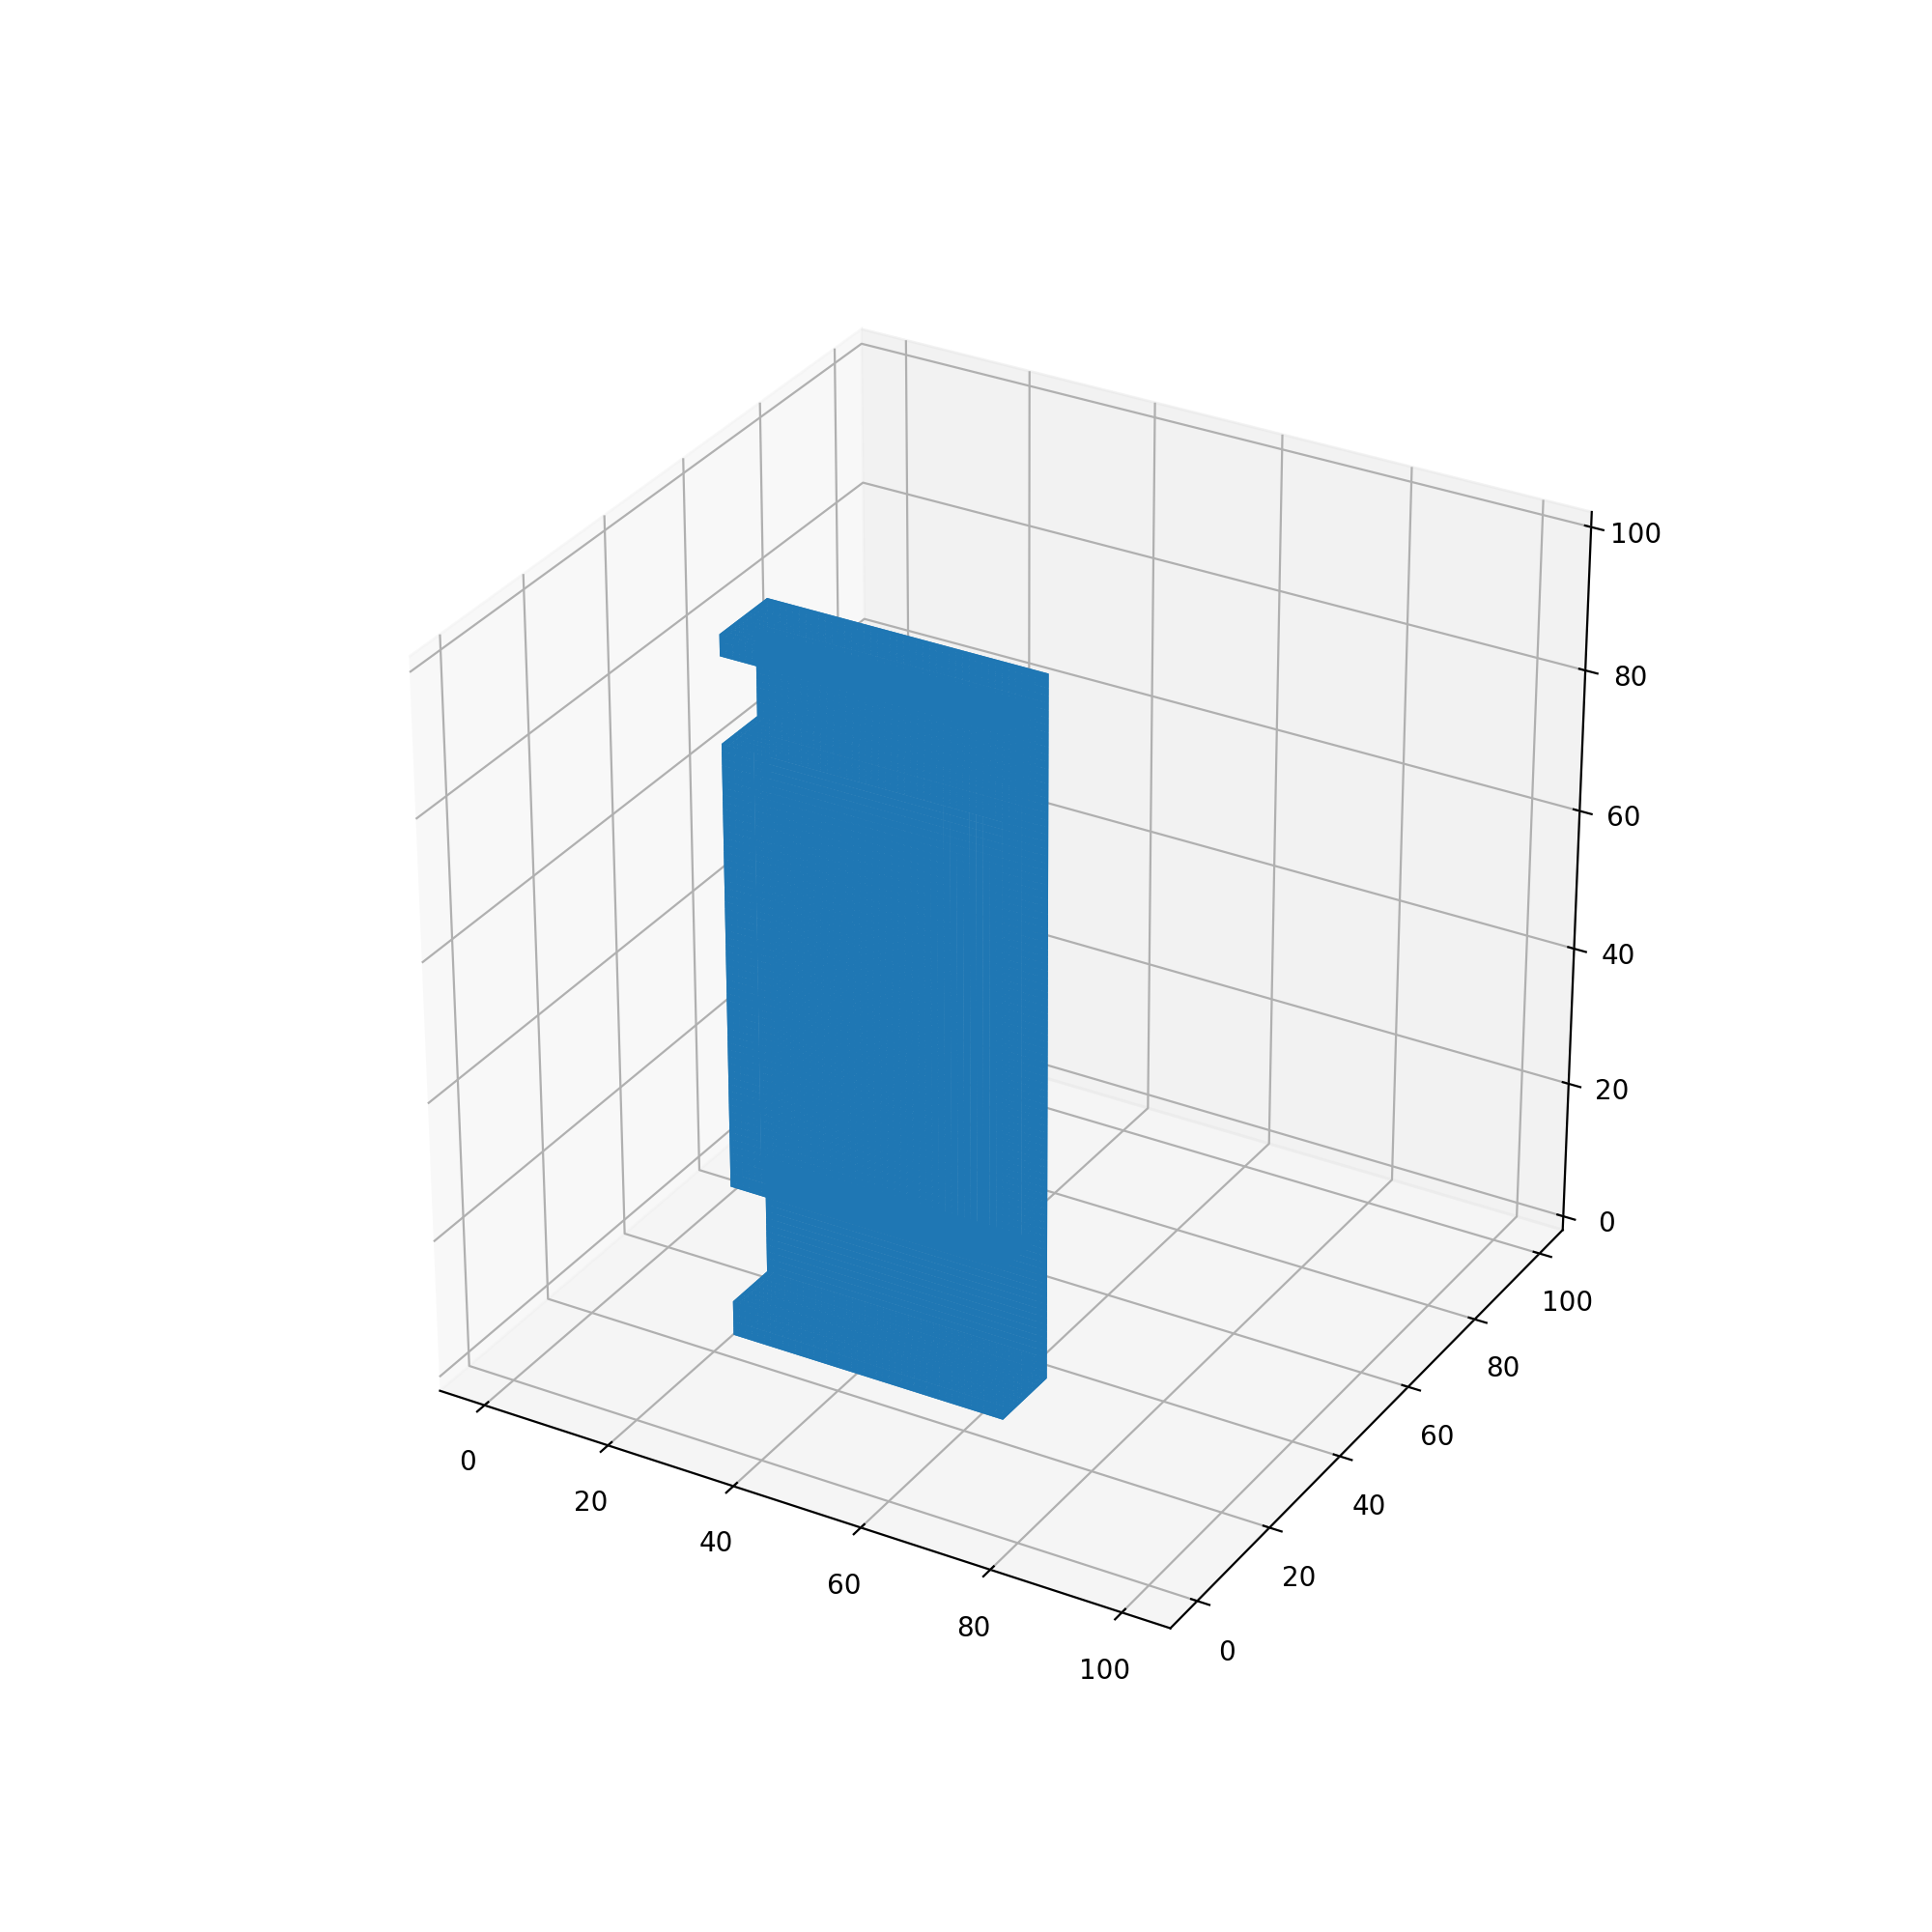

In [5]:
voxels = np.array(final_polycube)

# and plot everything
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.voxels(voxels)
fig.savefig('VoxelizedFinal.png')
fig.show()

In [ ]:
import cv2
import numpy as np

img = cv2.imread('messigray.png')
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(img_gray, 127, 255,0)
contours,hierarchy, _ = cv2.findContours(thresh,2,1)
cnt = contours[0]

cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

filename = 'img.png'
img = cv2.imread(filename)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

gray = np.float32(gray)
#BEST: dst = cv2.cornerHarris(gray,2,3,0.1)

testCoef = np.linspace(0.01, 2, 10)
testNei = np.linspace(1, 10, 10)

for i in range(0, len(testCoef)):
    for j in range(0, len(testNei)):
        dst = cv2.cornerHarris(gray,int(testNei[j]),3, testCoef[i])
        #result is dilated for marking the corners, not important
        dst = cv2.dilate(dst,None)

        file = open("testfile.txt","w") 
        file.write(str(np.array(dst)))
        file.close() 
        
        plt.title("coef = "+str(testCoef[i]) + ", testNei = " + str(testNei[j]))
        numpy.set_printoptions(threshold=numpy.nan)
        plt.imshow(np.array(dst))
        print(np.array(dst))
        #plt.title("coef = "+str(testCoef[i]) + ", testNei = " + str(testNei[j]))
        plt.show()
        
        #cv2.imshow('dst_1', dst)

    # Threshold for an optimal value, it may vary depending on the image.
    img[dst>0.01*dst.max()]=[0,0,255]

#cv2.imshow('dst',img)

In [ ]:
import cv2
import numpy as np

output = np.zeros(train_input[45,:,:].shape)

for i in range(0,100):
    for j in range(0,100):
        if np.array(train_input[45,i,j]):
           output[i][j] = 255
            
cv2.imwrite('messigray.png', np.array(output))

im=cv2.imread('messigray.png',0)
imgray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(imgray, 127, 255, 0)
im2, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

cv2.drawContours(img, contours, -1, (0,255,0), 3)

In [ ]:
from PIL import Image

output = np.ones(train_input.shape)
blur = np.array(train_input[45,:,:])
plt.imshow(blur)
plt.show()

from scipy import misc, ndimage, signal
import numpy as np

median_face = ndimage.median_filter(blur, size=3)
fig = plt.figure()
#plt.gray()  # show the filtered result in grayscale
ax1 = fig.add_subplot(121)  # left side
ax2 = fig.add_subplot(122)  # right side
ax1.imshow(blur)
ax2.imshow(median_face)
fig.show()

blurred_face = ndimage.gaussian_filter(blur, sigma=.2)
fig = plt.figure()
#plt.gray()  # show the filtered result in grayscale
ax1 = fig.add_subplot(121)  # left side
ax2 = fig.add_subplot(122)  # right side
ax1.imshow(blur)
ax2.imshow(blurred_face)
fig.show()

wiener_face = signal.wiener(blur, (5, 5))
fig = plt.figure()
#plt.gray()  # show the filtered result in grayscale
ax1 = fig.add_subplot(121)  # left side
ax2 = fig.add_subplot(122)  # right side
ax1.imshow(blur)
ax2.imshow(wiener_face)
fig.show()

image = ndimage.binary_erosion(blur).astype(blur.dtype)
fig = plt.figure()
#plt.gray()  # show the filtered result in grayscale
ax1 = fig.add_subplot(121)  # left side
ax2 = fig.add_subplot(122)  # right side
ax1.imshow(blur)
ax2.imshow(image)
fig.show()

image = ndimage.binary_opening(blur, structure=np.ones((3,3))).astype(blur.dtype)
fig = plt.figure()
#plt.gray()  # show the filtered result in grayscale
ax1 = fig.add_subplot(121)  # left side
ax2 = fig.add_subplot(122)  # right side
ax1.imshow(blur)
ax2.imshow(image)
fig.show()

image = ndimage.binary_closing(blur, structure=np.ones((3,3))).astype(blur.dtype)
fig = plt.figure()
#plt.gray()  # show the filtered result in grayscale
ax1 = fig.add_subplot(121)  # left side
ax2 = fig.add_subplot(122)  # right side
ax1.imshow(blur)
ax2.imshow(image)
fig.show()


image = ndimage.binary_closing(image, structure=np.ones((3,3))).astype(blur.dtype)
image = ndimage.binary_opening(blur, structure=np.ones((3,3))).astype(blur.dtype)
fig = plt.figure()
#plt.gray()  # show the filtered result in grayscale
ax1 = fig.add_subplot(121)  # left side
ax2 = fig.add_subplot(122)  # right side
ax1.imshow(blur)
ax2.imshow(image)
fig.show()

image = ndimage.binary_opening(image, structure=np.ones((3,3))).astype(blur.dtype)
image = ndimage.binary_closing(blur, structure=np.ones((3,3))).astype(blur.dtype)
fig = plt.figure()
#plt.gray()  # show the filtered result in grayscale
ax1 = fig.add_subplot(121)  # left side
ax2 = fig.add_subplot(122)  # right side
ax1.imshow(blur)
ax2.imshow(image)
fig.show()

el = ndimage.generate_binary_structure(2, 1) 
el
print(el.astype(np.int)) 

image = ndimage.binary_opening(image, structure=el).astype(blur.dtype)
image = ndimage.binary_closing(blur, structure=el).astype(blur.dtype)
fig = plt.figure()
#plt.gray()  # show the filtered result in grayscale
ax1 = fig.add_subplot(121)  # left side
ax2 = fig.add_subplot(122)  # right side
ax1.imshow(blur)
ax2.imshow(image)
fig.show()

image = ndimage.binary_closing(blur, structure=el).astype(blur.dtype)
fig = plt.figure()
#plt.gray()  # show the filtered result in grayscale
ax1 = fig.add_subplot(121)  # left side
ax2 = fig.add_subplot(122)  # right side
ax1.imshow(blur)
ax2.imshow(image)
fig.show()

image = ndimage.binary_opening(image, structure=el).astype(blur.dtype)
fig = plt.figure()
#plt.gray()  # show the filtered result in grayscale
ax1 = fig.add_subplot(121)  # left side
ax2 = fig.add_subplot(122)  # right side
ax1.imshow(blur)
ax2.imshow(image)
fig.show()


image = ndimage.binary_erosion(blur, structure=el).astype(blur.dtype)
image = ndimage.binary_dilation(image, structure=el).astype(blur.dtype)
fig = plt.figure()
#plt.gray()  # show the filtered result in grayscale
ax1 = fig.add_subplot(121)  # left side
ax2 = fig.add_subplot(122)  # right side
ax1.imshow(blur)
ax2.imshow(image)
fig.show()

# Now that we have only one connected component, extract it's bounding box
slice_x, slice_y = ndimage.find_objects(label_im==4)[0]
roi = im[slice_x, slice_y]

plt.figure(figsize=(4, 2))
plt.axes([0, 0, 1, 1])
plt.imshow(roi)
plt.axis('off')

plt.show()

'''for i in range(0, len(train_input[:,0,0])):
    blur = np.array(train_input[i,:,:])
    img = Image.fromarray(blur)
    #print(img)
    kernel = np.ones((3,3),np.uint8)
    erosion = cv2.erode(img,kernel,iterations = 1)
    #opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
    output[i,:,:] = np.array(erosion)
    
voxels = np.array(output)

# and plot everything
fig = plt.figure(figsize=(15,15))
ax = fig.gca(projection='3d')
ax.voxels(voxels)
fig.savefig('Voxelized.png')
fig.show()'''


In [ ]:
mask = blur > blur.mean()

label_im, nb_labels = ndimage.label(mask)

# Find the largest connected component
sizes = ndimage.sum(mask, label_im, range(nb_labels + 1))
mask_size = sizes < 100
remove_pixel = mask_size[label_im]
label_im[remove_pixel] = 0
labels = np.unique(label_im)
label_im = np.searchsorted(labels, label_im)

# Now that we have only one connected component, extract it's bounding box
slice_x, slice_y = ndimage.find_objects(label_im==0)[0]
roi = im[slice_x, slice_y]

plt.figure(figsize=(4, 2))
plt.axes([0, 0, 1, 1])
plt.imshow(roi)
plt.axis('off')

plt.show()

In [ ]:
voxels = np.array(train_input)

# and plot everything
fig = plt.figure(figsize=(15,15))
ax = fig.gca(projection='3d')
ax.voxels(voxels)
fig.savefig('Voxelized.png')
fig.show()

In [ ]:
voxels = np.array(corner_input)

# and plot everything
fig = plt.figure(figsize=(15,15))
ax = fig.gca(projection='3d')
ax.voxels(voxels)
fig.savefig('Voxelized.png')
fig.show()

In [ ]:
voxels = np.array(voting_input)

# and plot everything
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.voxels(voxels)
fig.savefig('Voxelized.png')
fig.show()

In [ ]:
voting_input = np.array(voting_input)

plt.imshow(voting_input[75])
plt.show()

plt.imshow(voting_input[75], aspect=0.5)
plt.show()

#Visualise the "in front of the car slice"
#struct_arr2 = voting_input.T
#plt.imshow(struct_arr2[75])

In [ ]:
import time
import matplotlib.pyplot as plt
import numpy as np

voting_input = np.array(voting_input)

def multi_slice_viewer(volume):
    fig, ax = plt.subplots()
    for i in range (0, 99):
        plt.imshow(volume[i])
        time.sleep(0.5)
        plt.show()
        if (i==99):
            i = 0

In [ ]:
#multi_slice_viewer(voting_input.T)

In [ ]:
grid_size = 100
from scipy import ndimage, misc
import matplotlib.pyplot as plt
import numpy as np
import cv2

voting_input = np.array(voting_input)

lm = ndimage.filters.maximum_filter( voting_input, size=10)
msk = (voting_input == lm) #// convert local max values to binary mask

#A partir du max on peut faire des connected components mais le problème est que ça n'existe pas en 3D en python
#et que en matlab donc soit on doit faire à la main soit faire autrement. PAr contre ensuite ce qu'il fait n'est 
#pas clair pour moi ... Une fois que c'est clair on peut implementer 

#Autre problème est la forme de la voiture puisque ici le max n'est pas au bon endroit sauf si on veut faire un 
#cube dans ce cas on a les contour déjà dessinéer rien que avec les max et on a juste à trouver les bords 

#Question du padding est-ce qu'il faut faire un zéro padding puisque pour l'instant la voiture est sur les bords 
    
fig = plt.figure()
#plt.gray()  # show the filtered result in grayscale
ax1 = fig.add_subplot(121)  # left side
ax2 = fig.add_subplot(122)  # right side
ax3 = fig.add_subplot(123)  # right side
result = ndimage.maximum_filter(voting_input[35], size=10)
ax1.imshow(voting_input[35])
ax2.imshow(result)
ax3.inshow(L)

plt.show()